#### What is the distribution of time differences between messages, replies, reactions, and any type event (message, reply, reaction)?
- Plot a histogram of the time difference between 
    1. Consecutive messages 
    2. Consecutive replies 
    3. Consecutive reactions
    4. Consecutive events (message, reply, reaction)


In [90]:
%reload_ext autoreload
%autoreload 2

In [91]:
import os, sys
import re
import json
import glob
import datetime
from collections import Counter

import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

from nltk.corpus import stopwords
from collections import defaultdict

# from wordcloud import WordCloud

In [92]:
# Add parent directory to path to import modules from src
rpath = os.path.abspath('..')
if rpath not in sys.path:
    sys.path.insert(0, rpath)

from src.loader import SlackDataLoader
import src.utils as utils

In [93]:
data_loader = SlackDataLoader("../data")
all_channels = data_loader.get_channels()
userNamesById, userIdsByName = data_loader.get_user_map()
messages_with_timestamp = data_loader.get_all_channels_messages()

In [94]:

def calculate_time_differences(timestamps):
    """
    Calculate time differences between consecutive timestamps.

    Args:
        timestamps (list): List of tuples containing message text and timestamp.

    Returns:
        list: List of time differences in hours.
    """
    time_diffs = []

    for i in range(1, len(timestamps)):
        ts1 = float(timestamps[i - 1][1])
        ts2 = float(timestamps[i][1])
        time_diff = ts2 - ts1
        time_diffs.append(time_diff/3600)

    return time_diffs

def plot_histogram(data, title, xlabel, ylabel, bins=20):
    """
    Plot a histogram.

    Args:
        data (list): List of values to plot.
        title (str): Title of the plot.
        xlabel (str): Label for the x-axis.
        ylabel (str): Label for the y-axis.
        bins (int): Number of bins in the histogram.
    """
    plt.hist(data, bins=bins, edgecolor='black', alpha=0.7)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()


### Distribution Histogram of consecutive messages of channel all-week3

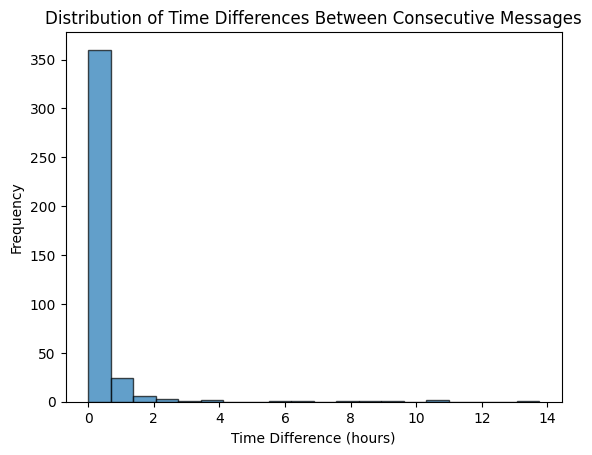

In [95]:
# Calculate time differences
messages_with_timestamp = data_loader.get_channel_messages("all-week3")
messages_with_timestamp.sort(key=lambda x: float(x[1]))

time_diffs_messages = calculate_time_differences(messages_with_timestamp)

# Plot histogram
plot_histogram(time_diffs_messages, 'Distribution of Time Differences Between Consecutive Messages',
               'Time Difference (hours)', 'Frequency')

### Distribution Histogram of consecutive messages from all channel

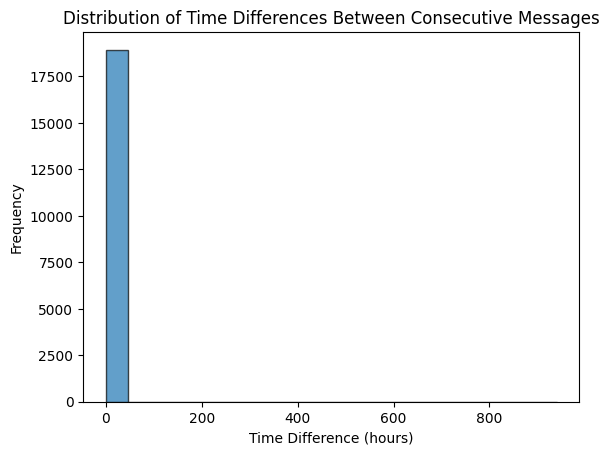

In [96]:
# Calculate time differences
messages_with_timestamp = data_loader.get_all_channels_messages()
messages_with_timestamp.sort(key=lambda x: float(x[1]))

time_diffs_messages = calculate_time_differences(messages_with_timestamp)

# Plot histogram
plot_histogram(time_diffs_messages, 'Distribution of Time Differences Between Consecutive Messages',
               'Time Difference (hours)', 'Frequency')

### Distribution Histogram of consecutive replies of channel all-week1

In [97]:
def calculate_replies_time_differences(replies):
    time_diffs = []

    for reply_list in replies:
        for i in range(1, len(reply_list)):
            ts1 = float(reply_list[i - 1]['ts'])
            ts2 = float(reply_list[i]['ts'])
            time_diff = ts2 - ts1
            time_diffs.append(time_diff/3600)

    return time_diffs

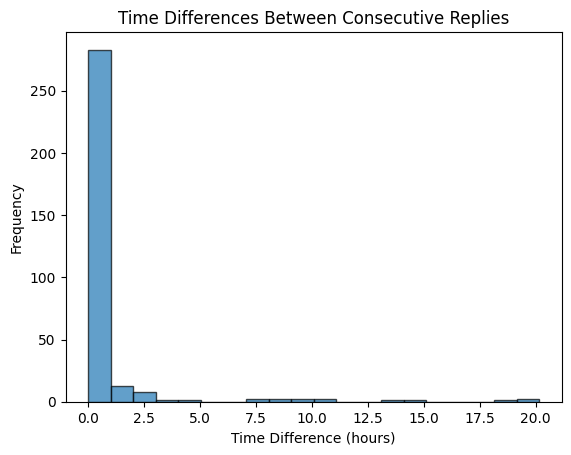

In [98]:
replies = utils.get_channel_messages_replies("../data/all-week1")
time_diffs = calculate_replies_time_differences(replies)
plot_histogram(time_diffs, 'Time Differences Between Consecutive Replies', 'Time Difference (hours)', 'Frequency')



### Distribution Histogram of consecutive replies from all channel

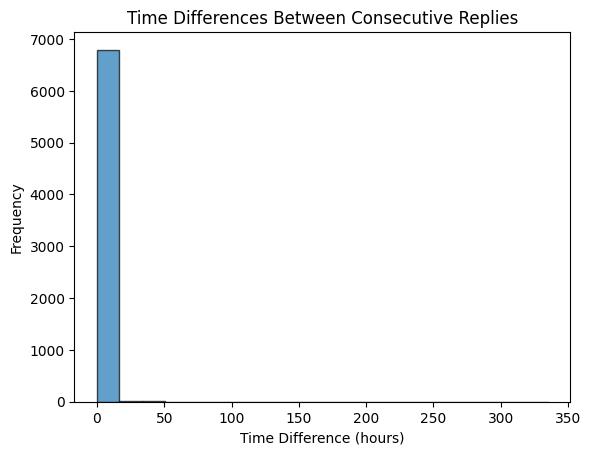

In [99]:
replies = []
for channel in all_channels: 
    channel_message_replies = utils.get_channel_messages_replies("../data/" + channel["name"])
    if channel_message_replies:
        replies.extend(channel_message_replies)

time_diffs = calculate_replies_time_differences(replies)
plot_histogram(time_diffs, 'Time Differences Between Consecutive Replies', 'Time Difference (hours)', 'Frequency')


### Distribution Histogram of consecutive events of channel all-week1

In [109]:
def calculate_events_time_differences(events):
    time_diffs = []

    for i in range(1, len(events)):
        ts1 = float(events[i - 1])
        ts2 = float(events[i])
        time_diff = ts2 - ts1
        time_diffs.append(time_diff/3600)

    return time_diffs

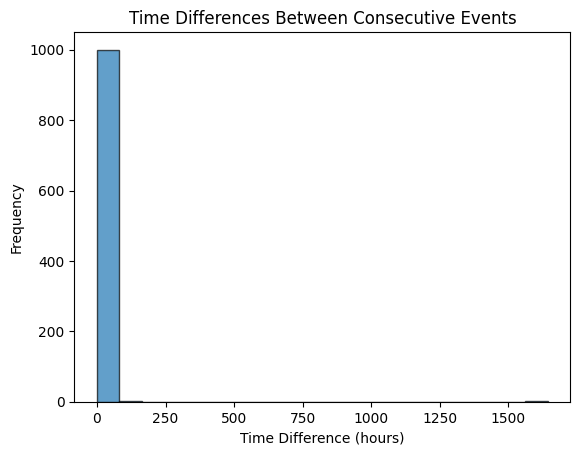

In [104]:
events_timestamp = utils.get_all_events_timestamp_on_channel("../data/all-week1")
events_timestamp.sort()
time_diffs = calculate_events_time_differences(events_timestamp)
plot_histogram(time_diffs, 'Time Differences Between Consecutive Events', 'Time Difference (hours)', 'Frequency')

### Distribution Histogram of consecutive events of all channels

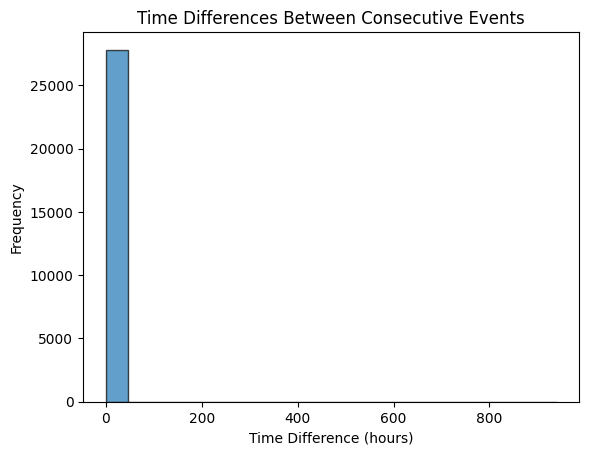

In [110]:
events = []
for channel in all_channels: 
    channel_events = utils.get_all_events_timestamp_on_channel("../data/" + channel["name"])
    events.extend(channel_events)

events.sort()
time_diffs = calculate_events_time_differences(events)
plot_histogram(time_diffs, 'Time Differences Between Consecutive Events', 'Time Difference (hours)', 'Frequency')